<hr>
<center>
   <font size='4'> <B> Desafio: </B> BMD é uma empresa vende bermudas e está buscando aumentar suas vendas. Ela nos fornece uma base de dados e deseja saber o que pode fazer para melhorar nesse quesito. </font> <br>
    <br>
    <font size='3'> <I> <B> Análise feita por: </B> Yasmin de Miranda Nobre </I> </font> <br>
    <br>
    <font size='3'> <I> <B> Base de dados por: </B> Hasthag Programação </I> </font>
</center> 
<hr>


## 1) Importando bibliotecas e base de dados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
base = pd.read_excel("Vendas.xlsx")

In [42]:
base[base["id"]=="Norte Shopping"]

,data,id,produto,qtd,v_u,v_f
2,2019-12-01,Norte Shopping,Bermuda,2,150,300
24,2019-12-11,Norte Shopping,Bermuda Xadrez,2,155,310
30,2019-12-16,Norte Shopping,Bermuda Listrado,1,163,163
32,2019-12-17,Norte Shopping,Bermuda Xadrez,1,155,155
36,2019-12-18,Norte Shopping,Bermuda Listrado,3,163,489
41,2019-12-19,Norte Shopping,Bermuda,1,150,150
44,2019-12-21,Norte Shopping,Bermuda Estampa,5,169,845
45,2019-12-21,Norte Shopping,Bermuda,4,150,600
49,2019-12-23,Norte Shopping,Bermuda Linho,2,195,390
50,2019-12-23,Norte Shopping,Bermuda,2,150,300


## 2) Análise exploratória da base de dados

In [63]:
base.head() #visualizando as 5 primeiras observações da base de dados

,Data,ID Loja,Produto,Quantidade,Valor Unitário,Valor Final
0,2019-12-01,Iguatemi Campinas,Bermuda Estampa,1,169,169
1,2019-12-01,Iguatemi Esplanada,Bermuda Xadrez,1,155,155
2,2019-12-01,Norte Shopping,Bermuda,2,150,300
3,2019-12-01,Iguatemi Campinas,Bermuda Listrado,3,163,489
4,2019-12-01,Iguatemi Campinas,Bermuda Linho,3,195,585


A fim de tornar a análise mais simples, iremos mudar os nomes das variáveis:

In [3]:
base.columns=['data',"id",'produto','qtd','v_u','v_f']
base.head()

,data,id,produto,qtd,v_u,v_f
0,2019-12-01,Iguatemi Campinas,Bermuda Estampa,1,169,169
1,2019-12-01,Iguatemi Esplanada,Bermuda Xadrez,1,155,155
2,2019-12-01,Norte Shopping,Bermuda,2,150,300
3,2019-12-01,Iguatemi Campinas,Bermuda Listrado,3,163,489
4,2019-12-01,Iguatemi Campinas,Bermuda Linho,3,195,585


Legenda da Base de Dados: <br>
1. <I> data </I>: Dia da venda <br>
   <br>
2. <I> id </I>: Identificação da loja onde ocorreu a venda <br>
    <br>
3. <I> produto </I>: Produto que foi vendido <br>
   <br>
4. <I> qtd </I>: Quantidade do produto que foi vendida <br>
    <br>
5. <I> v_u </I>: Valor unitário, em reais, do produto que está sendo vendido <br>
    <br>
6. <I> v_f </I>: Valor final (total), em reais, da venda. Considera a quantidade de produtos que foram vendidos e multiplica pelo seu valor unitário. Ao longo da análise pode ser referido como "valor da venda" <br>

### 2.1) Quanto ao valor das vendas  (valor final)

C:\Users\yasmi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


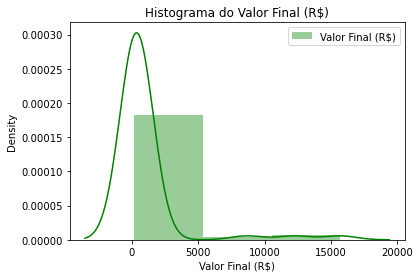

In [4]:
sns.distplot(base['v_f'], bins=3, 
             axlabel="Valor Final (R\$)", 
             color="green",
             label = "Valor Final (R\$)")

plt.title("Histograma do Valor Final (R\$)")
plt.legend()

In [5]:
base['v_f'].describe() 

count       57.000000
mean       980.614035
std       2757.203926
min        150.000000
25%        163.000000
50%        310.000000
75%        600.000000
max      15700.000000
Name: v_f, dtype: float64

<B> Comentários </B>: <br>
<br>    
A partir do comando 'describe' notamos que 57 vendas foram observadas. Nesse conjunto de dados notamos que um cliente aleatório inviste em média $R\$980$ reais na BMD.

Entretanto, como notamos no histograma apresentado e nas medidas 'std' (desvio padrão), 'min' (mínimo) e 'max' (máximo), existe uma grande variação no valor final de uma venda: Houveram clientes cujas compras somaram valores relativamente baixos, como $R\$150$, e outros cujo investimento total foi de quase $R\$16.000$. 

Entretanto, a maior parte dos clientes tendem a gastar "pouco", ou seja, até 5 mil reais na empresa. Percebemos pelo gráfico que em poucas vezes o valor final foi maior que este número. 

Utilizando essas informações, sugerimos o estudo mais profundo dos fatores que influenciam o valor das vendas, bem como do perfil dos clientes. Essa investigação pode levar a empresa BMD a aumentar sua quantidade de vendas e seu faturamento. 

### 2.2) Quanto à quantidade de vendas

C:\Users\yasmi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


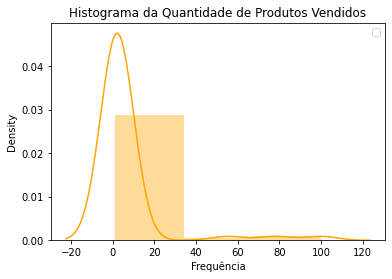

In [43]:
sns.distplot(base['qtd'], bins=3, 
             axlabel="Frequência", 
             color="orange")

plt.title("Histograma da Quantidade de Produtos Vendidos")
plt.legend()

In [8]:
base['qtd'].describe() 

count     57.000000
mean       6.140351
std       17.577826
min        1.000000
25%        1.000000
50%        2.000000
75%        4.000000
max      100.000000
Name: qtd, dtype: float64

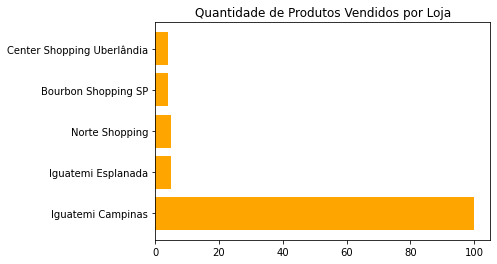

In [61]:
plt.barh(base['id'],base['qtd'], color="orange")
plt.title("Quantidade de Produtos Vendidos por Loja")
plt.show()


In [85]:
from tabulate import tabulate
 
tab = [
    [150, 23],
    [155, 28],
    [157, 233],
    [163, 25],
    [169, 21],
    [195, 20]
]
 
# create header
head = ["Valor Unitário", "Quantidade de Produtos Vendidos"]
 
# display table
print(tabulate(tab, headers=head, tablefmt="grid"))

+------------------+-----------------------------------+
|   Valor Unitário |   Quantidade de Produtos Vendidos |
+==================+===================================+
|              150 |                                23 |
+------------------+-----------------------------------+
|              155 |                                28 |
+------------------+-----------------------------------+
|              157 |                               233 |
+------------------+-----------------------------------+
|              163 |                                25 |
+------------------+-----------------------------------+
|              169 |                                21 |
+------------------+-----------------------------------+
|              195 |                                20 |
+------------------+-----------------------------------+


### 2.3) Quanto à loja

In [88]:
base['id'].value_counts(sort=False) #fazer grafico de barras para representacao

Iguatemi Campinas             16
Iguatemi Esplanada             8
Norte Shopping                11
Bourbon Shopping SP           13
Center Shopping Uberlândia     9
Name: id, dtype: int64

## 3) Análise inferencial da base de dados (Univariada)

## 4) Análise Multivariada da base de dados

## 5) Uso de machine learning na base de dados

In [75]:
pd.crosstab(index=base['v_u'],columns=base['qtd'])

qtd,1,2,3,4,5,55,78,100
v_u,,,,,,,,
150,2,3,1,3,0,0,0,0
155,8,1,2,3,0,0,0,0
157,0,0,0,0,0,1,1,1
163,6,3,3,1,0,0,0,0
169,6,1,0,2,1,0,0,0
195,3,1,2,1,1,0,0,0
